# Auswertung einer Widerstandstiefensondierung
## Grundlagen der Methode

Bei einer Widerstandstiefensondierung werden scheinbare spezifische elektrische Widerstände $\rho_s$ aufgezeichnet.
Dabei wird der Abstand der Stromelektroden A ud B unter Beibehaltung des Mittelpunktes der Anordnung schrittweise vergrößert.
Ist der Abstand zwischen den Potentialsonden M und N immer kleiner als AB/3, sprechen wir von einer *Schlumbergeranordnung*.

Die Geoelektrik-Apparatur misst dabei elektrische Spannungen zwischen den Sonden M und N sowie den zwischen den Elektroden A und B fließenden elektrischen Strom.
Daraus wird mit der Beziehung
$$
R = \frac{U}{I}
$$
zunächst der Ohmsche Widerstand ermittelt.
Dieser wird mit dem Konfigurationsfaktor $k = f(AB/2)$ multipliziert.
Wir erhalten auf diese Weise den scheinbaren spezifischen elektrischen Widerstand
$$
\rho_s = R \cdot k.
$$

## Auswertung
Das Ziel der Auswertung besteht in der Ermittlung der *spezifischen Widerstände* und *Mächtigkeiten* von Bodenschichten unter der Annahme einer näherungsweise horizontalen Lagerung.
Die Messwerte werden zunächst graphisch als *Sondierungskurve* $\rho_s = f(AB/2)$ dargestellt.
Aus dem Kurvenverlauf schätzt man die minimale Anzahl von Schichten ab.

Das folgende Beispiel zeigt eine Sondierungskurve, zu deren Interpretation ein Dreischichtfall hinreichend ist.

![Sondierungskurve](soundingcurve.png)

Für die Auswertung benutzen wir die Python-Bibliothek pygimli ([www.pygimli.org](http://www.pygimli.org)).

Dazu importieren wir das Modul `functions`.

In [1]:
from functions import *

Die Daten wurden für logarithmisch äquidistante Positionen der Stromelektroden aufgenommen.
Wir fassen die Messwerte in einer Tabelle zusammen:

| AB/2 in m | $\rho_s$ in $\Omega\cdot m$ |
|-------------|-----------------------------|
| 1.0 | 195.07 |
 |1.3   | 197.25 |
 |1.8  | 186.88 |
 |2.4   | 162.47 |
 |3.2   | 127.12 |
 |4.2   | 89.57 |
 |5.6   | 55.84 |
 |7.5   | 33.14 |
 |10.0   | 29.21 |
 |13.0   | 31.63 |
 |18.0   | 42.90 |
 |24.0   | 57.91 |
 |32.0   | 72.59 |
 |42.0   | 96.33 |
 |56.0   | 121.64 |
 |75.0   | 168.55 |
 |100.0   | 204.98 |
 
Der Abstand der Potentialsonden betrug 0.3 m.

Die Werte fassen wir in den *Python*-Arrays `ab2`, `mn2` und `rhos` zusammen:

In [2]:
ab2 = np.array([1.0, 1.3, 1.8, 2.4, 3.2, 4.2, 5.6, 7.5, 10, 13, 18, 24, 32, 42, 56, 75, 100])
mn2 = 0.3 * np.ones(len(ab2))

In [3]:
rhoa = np.array([195.07, 197.25, 186.88, 162.47, 127.12, 89.57,
 55.84, 33.14, 29.21, 31.63, 42.90, 57.91, 72.59, 96.33, 121.64,
 168.55, 204.98])

### Modellanpassung

Wir versuchen jetzt durch Probieren, die gemessene Sondierungskurve mit einer synthetischen Sondierungskurve in Übereinstimmung zu bringen.

Dafür tragen wir in das Array `res` die Werte für die spezifischen elektrischen Widerstände der drei Schichten an der Erdoberfläche beginnend ein:

In [11]:
res = [100.0, 50.0, 2000.0]

Die Mächtigkeiten dieser Schichten fassen wir im Array `thk` zusammen. Beachten sie, dass die Mächtigkeit der letzten Schicht (des Substratums) unendlich ist und daher in `thk` weggelassen wird.

In [12]:
thk = [2.0, 4.0]

Die Funktion `datenberechnen` berechnet die scheinbaren spezifischen Widerstände, die wir bei einer Messung über einem Dreischichtfall mit den spezifischen Widerständen und Mächtigkeiten für die vorgegebenen Stromelektrodenabstände erhalten würden:

In [13]:
rhoanew = datenberechnen(ab2, mn2, res, thk, 0.0)

Die so erhaltenen Werte stellen wir gemeinsam mit den Messwerten grafisch dar:

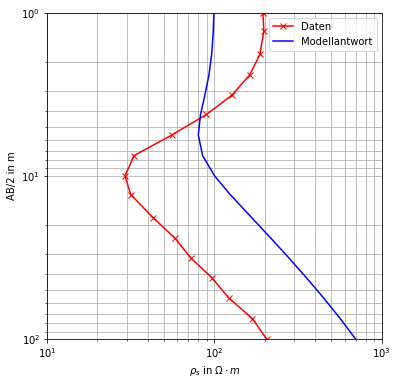

In [14]:
datenvergleichen(rhoa, rhoanew, ab2)

Da wir eine möglichst gute Übereinstimmung beider Kurven anstreben, ist es u.U. nötig, zur Definition von `res` und `thk` zurückzukehren, um die Rechnung mit veränderten Werten zu wiederholen.

Notieren Sie die Werte von `res` und `thk`, wenn Sie zufrieden sind mit der Anpassung.

### Automatische Modellfindung
Für eine automatische Ermittlung der spezifischen Widerstände `res` und Mächtigkeiten `thk` wird das Verfahren der geophysikalischen Dateninversion eingesetzt.

Dabei wird ein aus den Messwerten erzeugtes Startmodell mit `nl` Schichten systematisch verändert, bis dessen Modellantwort mit den gemessenen Daten bis auf eine vorgegebene Diskrepanz `errPerc` übereinstimmt.
Der Parameter `lam` steuert, wie groß die Sprünge zwischen den spezifischen Widerständen der einzelnen Schichten sein dürfen. 

In [32]:
nl = 3
lam = 100.0
errPerc = 3.0
resnew, thknew, rhoaresponse, relrms, chi2 = dateninversion(ab2, mn2, rhoa, nl, lam, errPerc)

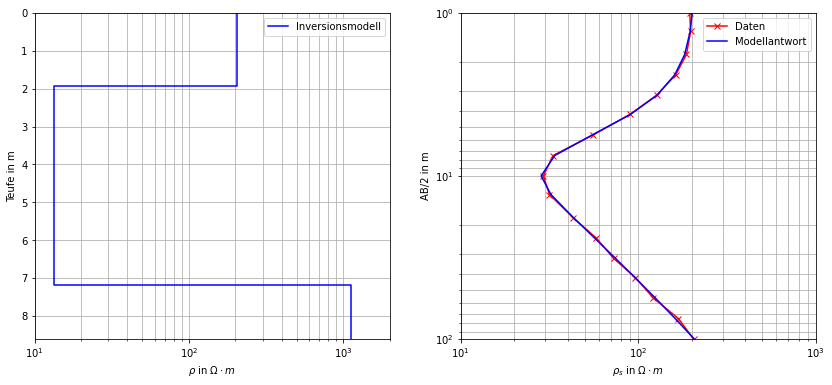

In [33]:
plotresults(resnew, thknew, ab2, rhoa, rhoaresponse)

## Zusammenfassung der Resultate
### Spezifische elektrische Widerstände

In [45]:
print("Spezifische elektrische Widerstände in Ohm*m:")
for r in resnew:
    print(f'{r:8.2f}')

Spezifische elektrische Widerstände in Ohm*m:
  206.02
   13.29
 1127.81


### Mächtigkeiten

In [46]:
print("Schichtmächtigkeiten in m:")
for t in thknew:
    print(f'{t:8.2f}')

Schichtmächtigkeiten in m:
    1.93
    5.24


### Bewertung der Anpassug
Die Güte der Anpassung wird durch die Summe der Quadrate der Differenzen zwischen den gemessenen und synthetischen Werten der Sondierungskurve bestimmt.

Wir unterscheiden zwischen *relativem RMS-Fehler* und $\chi^2$-*Fehler*.

In [42]:
print("Relativer RMS-Fehler = ", f'{relrms:.2f}')
print("chi^2-Fehler         = ", f'{chi2:.2f}')

Relativer RMS-Fehler =  2.04
chi^2-Fehler         =  0.47
